<a href="https://colab.research.google.com/github/zenpp/Data-Science-Mini-Project/blob/master/Market%20Basket%20Analysis/Association_Rule.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
from itertools import combinations, groupby
from collections import Counter
%matplotlib inline

In [0]:
#mounted drive to this notebook
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
#load file in to data frame
file_path = '/content/drive/My Drive/Shareable /Data Science Projects/Market Basket Analysis'
data = pd.read_csv(file_path + '/mba_raw_data (1).csv')
data.head()

,created_at,order_id,product_id,name,qty_ordered
0,2019-09-18 04:56:51,132264,1120,STARBUCKS ESPRESSO DARK ROAST,1.0
1,2019-09-18 04:56:51,132264,1117,STARBUCKS COLOMBIA MEDIUM ROAST ESPRESSO,1.0
2,2019-09-18 04:56:51,132264,1119,STARBUCKS AMERICANO HOUSE BLEND MEDIUM ROAST,1.0
3,2019-09-18 04:55:39,132263,1130,Minime (RED) Free! LATTE MACCHIATO & LATTE GLA...,1.0
4,2019-09-18 04:49:13,132262,1116,STARBUCKS AMERICANO VERANDA BLEND,1.0


In [0]:
print(data.info())
print('=====================================')
print(data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117777 entries, 0 to 117776
Data columns (total 5 columns):
created_at     117777 non-null object
order_id       117777 non-null int64
product_id     117777 non-null int64
name           117777 non-null object
qty_ordered    117777 non-null float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.5+ MB
None
created_at     0
order_id       0
product_id     0
name           0
qty_ordered    0
dtype: int64


[Text(0, 0, 'New! Americano'),
 Text(0, 0, 'Chococino'),
 Text(0, 0, 'Cappuccino'),
 Text(0, 0, 'New! Café Au Lait'),
 Text(0, 0, 'Grande Intenso'),
 Text(0, 0, 'Espresso Intenso'),
 Text(0, 0, 'Latte Macchiato '),
 Text(0, 0, 'Espresso'),
 Text(0, 0, 'Lungo'),
 Text(0, 0, 'NEW! CORTADO')]

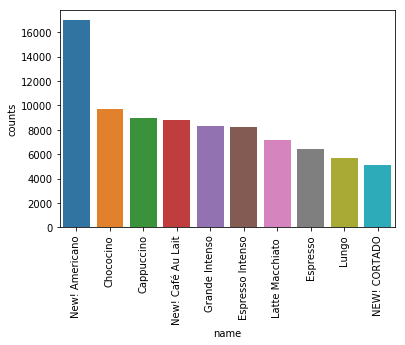

In [0]:
top10 = data.groupby('name').size().reset_index(name='counts')
top10 = temp.sort_values('counts', ascending=False).head(10)
plot = sns.barplot(x = 'name' , y = 'counts' , data = top10)
plot.set_xticklabels(plot.get_xticklabels(), rotation=90)

In [0]:
data['order_id'] = data['order_id'].astype('str')
basket = data.groupby(['order_id','name'])['qty_ordered'].sum().unstack().reset_index().fillna(0).set_index('order_id')
basket.head()

name,4x Mocha Free! Pop Glass Latte,All-time Favorite Set,BLACK & WHITE SET,BRIGHTER DAY SET,COFFEE LOVER SET,COFFEEHOLIC SET,Café Au Lait,Cappuccino,Cappuccino pop glass set (2 pcs),Chococino,Coffee Lover Set,Columbia Sierra Nevada Lungo,Drop (Dark Silver) Free! Americano,Drop Automatic Dark Silver,Drop Automatic Dark Silver by Krups,Esperta (Charcoal Black),Esperta Free! 2 espresso intenso & espresso glasses,Espresso,Espresso Intenso,Espresso Pop Glass Set (2 Pcs),Favor Me Set,Free Espresso Intenso,Genio (RED) Free! ESPRESSO INTENSO,Genio (Titanium) Free! Americano,Genio (Titanium) Free! ESPRESSO INTENSO,Genio Titanium,Grande Intenso,Green Tea,Green Tea Latte,Happy Family Set,INTENSO DUO SET,ITALIAN CLASSICS SET,Infinissima Black,Krups Descaling Powder,LUMIO (WHITE) - FESTIVE SET,Latte Macchiato,Latte pop glass set (2 pcs),Lumio (BLACK) FREE! ESPRESSO Intenso capsule,Lumio (Black) Free Americano,Lumio (Black) Free! Lungo jumbo,...,Mini me (cherry Black) Free! Lungo jumbo,Minime (Black) Free! ESPRESSO INTENSO,Minime (Black) Free! Latte pop Glass,Minime (Black) Free! Lungo jumbo,Minime (Cherry Black) Free! Cappuccino and Americano,Minime (Cherry Black) Free! ESPRESSO INTENSO,Minime (RED) Free! LATTE MACCHIATO & LATTE GLASSES,Minime (RED) Free! LATTE MACCHIATO CAPSULES & LATTE GLASSes,Minime (White) Free! Americano,Minime (White) Free! ESPRESSO INTENSO & ESPRESSO GLASSES,Minime (White) Free! LATTE MACCHIATO & LATTE GLASSES,Minime (White) Free! Lungo jumbo,Minime (White) Free! Variety pack 2019,Minime Black Free! Americano,Minime Cherry Black Free! Americano,NEW! CORTADO,NEW! Lumio Black,NEW! Lumio White,New! Café au Lait Intenso,New! Americano,New! Café Au Lait,New! Café au Lait mild,New! Lungo Jumbo,New! Movenza Black,New! Movenza Silver,New! Ristretto Barista,Peru Cajamarca Espresso,REST & RELAX SET,REST & ReLAX SET,Ristretto Ardenza,Ristretto Barista,STARBUCKS AMERICANO HOUSE BLEND MEDIUM ROAST,STARBUCKS AMERICANO VERANDA BLEND,STARBUCKS CAPPUCCINO,STARBUCKS COLOMBIA MEDIUM ROAST ESPRESSO,STARBUCKS ESPRESSO DARK ROAST,SUPER STRONG SET,TOP PICK SET,TRIPLE BLACK SET,WARM & COZY SET
order_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
100000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [0]:
def set_to_one(datum):
  if datum >= 1:
    return 1
  else:
    return 0

processed_basket = basket.applymap(set_to_one)
processed_basket.head()

name,4x Mocha Free! Pop Glass Latte,All-time Favorite Set,BLACK & WHITE SET,BRIGHTER DAY SET,COFFEE LOVER SET,COFFEEHOLIC SET,Café Au Lait,Cappuccino,Cappuccino pop glass set (2 pcs),Chococino,Coffee Lover Set,Columbia Sierra Nevada Lungo,Drop (Dark Silver) Free! Americano,Drop Automatic Dark Silver,Drop Automatic Dark Silver by Krups,Esperta (Charcoal Black),Esperta Free! 2 espresso intenso & espresso glasses,Espresso,Espresso Intenso,Espresso Pop Glass Set (2 Pcs),Favor Me Set,Free Espresso Intenso,Genio (RED) Free! ESPRESSO INTENSO,Genio (Titanium) Free! Americano,Genio (Titanium) Free! ESPRESSO INTENSO,Genio Titanium,Grande Intenso,Green Tea,Green Tea Latte,Happy Family Set,INTENSO DUO SET,ITALIAN CLASSICS SET,Infinissima Black,Krups Descaling Powder,LUMIO (WHITE) - FESTIVE SET,Latte Macchiato,Latte pop glass set (2 pcs),Lumio (BLACK) FREE! ESPRESSO Intenso capsule,Lumio (Black) Free Americano,Lumio (Black) Free! Lungo jumbo,...,Mini me (cherry Black) Free! Lungo jumbo,Minime (Black) Free! ESPRESSO INTENSO,Minime (Black) Free! Latte pop Glass,Minime (Black) Free! Lungo jumbo,Minime (Cherry Black) Free! Cappuccino and Americano,Minime (Cherry Black) Free! ESPRESSO INTENSO,Minime (RED) Free! LATTE MACCHIATO & LATTE GLASSES,Minime (RED) Free! LATTE MACCHIATO CAPSULES & LATTE GLASSes,Minime (White) Free! Americano,Minime (White) Free! ESPRESSO INTENSO & ESPRESSO GLASSES,Minime (White) Free! LATTE MACCHIATO & LATTE GLASSES,Minime (White) Free! Lungo jumbo,Minime (White) Free! Variety pack 2019,Minime Black Free! Americano,Minime Cherry Black Free! Americano,NEW! CORTADO,NEW! Lumio Black,NEW! Lumio White,New! Café au Lait Intenso,New! Americano,New! Café Au Lait,New! Café au Lait mild,New! Lungo Jumbo,New! Movenza Black,New! Movenza Silver,New! Ristretto Barista,Peru Cajamarca Espresso,REST & RELAX SET,REST & ReLAX SET,Ristretto Ardenza,Ristretto Barista,STARBUCKS AMERICANO HOUSE BLEND MEDIUM ROAST,STARBUCKS AMERICANO VERANDA BLEND,STARBUCKS CAPPUCCINO,STARBUCKS COLOMBIA MEDIUM ROAST ESPRESSO,STARBUCKS ESPRESSO DARK ROAST,SUPER STRONG SET,TOP PICK SET,TRIPLE BLACK SET,WARM & COZY SET
order_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
100000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
100001,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
100002,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
100003,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
100004,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [0]:
frequent_itemsets = apriori(processed_basket, min_support=0.05, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Chococino),(Cappuccino),0.201118,0.185550,0.051775,0.257437,1.387425,0.014458,1.096809
1,(Cappuccino),(Chococino),0.185550,0.201118,0.051775,0.279036,1.387425,0.014458,1.108075
2,(Cappuccino),(Latte Macchiato ),0.185550,0.148328,0.062602,0.337387,2.274596,0.035080,1.285323
3,(Latte Macchiato ),(Cappuccino),0.148328,0.185550,0.062602,0.422052,2.274596,0.035080,1.409209
4,(New! Americano),(Espresso Intenso),0.352696,0.171390,0.061816,0.175266,1.022612,0.001367,1.004699
